# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:

# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

data.describe()


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: We can expect that PCA will detect primary and secondary vectors that explains the data variace.
Data will probably be explained in just first two dimmensions. By using PCA we will be able to reduce these 6 variables to just the two of them that best captures that information. By having smaller number of dimmensions we will be able to visulize the data better. 

In [2]:
from sklearn import preprocessing
stnd = preprocessing.StandardScaler()
data_stnd = stnd.fit_transform(data)

/Users/rducic/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


###PCA

explained_variance_ratio_ [ 0.44082893  0.283764    0.12334413]
[<matplotlib.lines.Line2D object at 0x10abb6b90>, <matplotlib.lines.Line2D object at 0x10abb6e10>, <matplotlib.lines.Line2D object at 0x10abc5090>, <matplotlib.lines.Line2D object at 0x10abc5250>, <matplotlib.lines.Line2D object at 0x10abc5410>, <matplotlib.lines.Line2D object at 0x10abc55d0>]


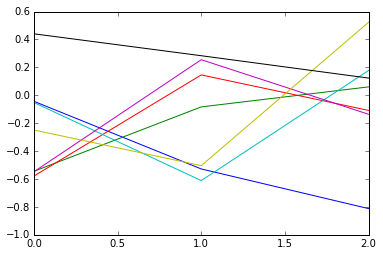

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


pca.fit(data_stnd)
pca_dt = pca.transform(data_stnd)

pca_df = pd.DataFrame(pca_dt, columns=['PC1','PC2', 'PC3'])


# Print the components and the amount of variance in the data contained in each dimension
#print 'components_', pca.components_
print 'explained_variance_ratio_', pca.explained_variance_ratio_
print plt.plot(pca.components_)
print plt.plot(pca.explained_variance_ratio_)
#plt.legend()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: We see that the first PC already explains  44% of the variance, while the second one accounts for another 28% for a total of almost 72% between the two of them. Third dimmension is responisble for 12%.

I am going to choose 3 dimmensions for my anlyses as they explain 88% of variance.



(-3, 1.5)

/Users/rducic/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


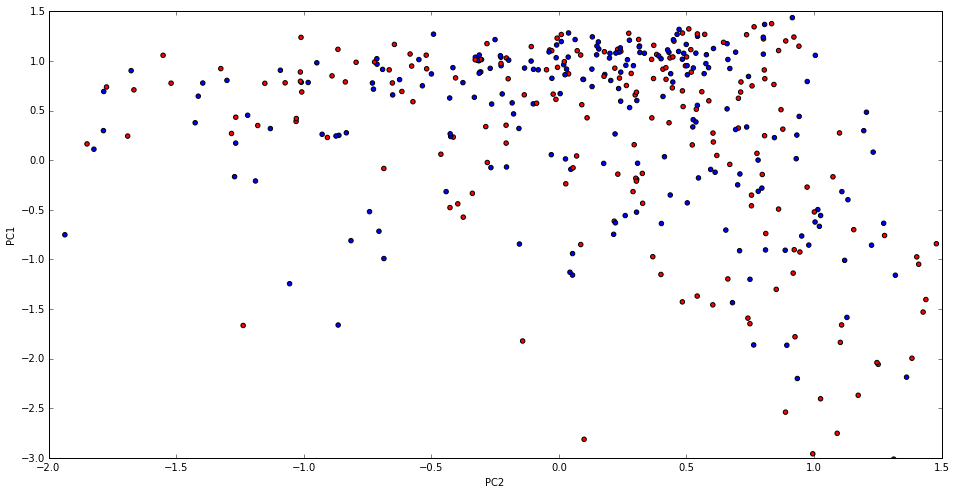

In [4]:

ax = pca_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8), c=['b', 'r'], marker=u'o')
ax.set_xlim (-2, 1.5)
ax.set_ylim (-3, 1.5)

# most of the variance is along the PC1 exis 


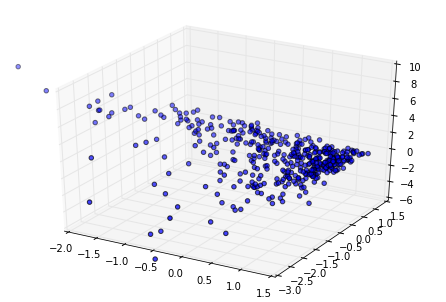

In [5]:
#attempting to make 3D plot with our 3 variables

from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pylab.figure()
ax = Axes3D(fig)



ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c=['b', 'r'], marker='o', )

ax.set_xlim (-2, 1.5)
ax.set_ylim (-3, 1.5)




pyplot.show()

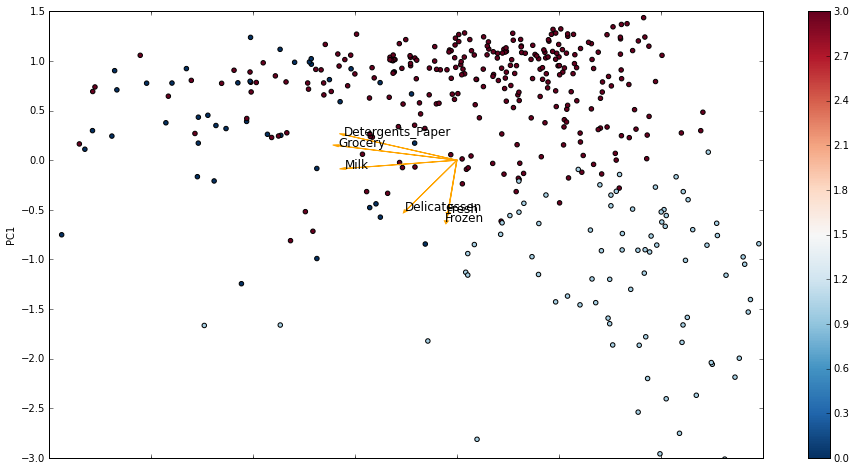

In [6]:
from sklearn.cluster import KMeans

df = pd.DataFrame(data_stnd, columns=['Fresh',  'Milk' , 'Grocery'  ,'Frozen' , 'Detergents_Paper' , 'Delicatessen'])

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(data)

pca_df['cluster'] = pd.Series(clusters.labels_, index=pca_df.index)

ax = pca_df.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=pca_df.cluster.astype(np.float),
        colormap = 'RdBu_r',
        figsize=(16,8),
        xlim = [-2, 1.5],
        ylim = [-3, 1.5]   )

for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)





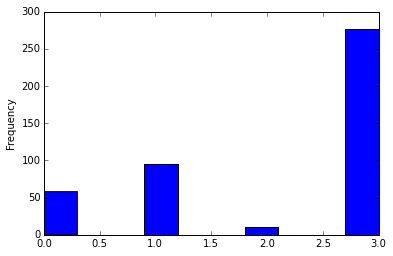

In [7]:

pca_df['cluster'].plot(kind='hist')

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: After applying PCA I have applied clustering. Fine tuning the number of clusters parameters, I can observe that the data is separted in four different clusters. Majority of the custores are in the Detergent_Paper and Grocery  

First two Dimmensions of PCA are two dimmensions that explain majority (86%) of variance in data. This is done by combining information from number of different original dimmensions to produce new dimmensions.  We can use this new dimmensions to represent the data in further machine learning algoritams, having advantage that we have reduced dimmensionality.   


From Above biplot we can see that customers can be grouped in 3-4 groups.

Detergent_Paper and Grocery
Milk 
Delicatessen 
Frozen 

The First Component places approximatly equal weight to Detergent_Paper and Grocery
Milk and much less weight to Delicatessen and Frozen 

The second component places most of its weight on Delicatessen & Frozen 

From this we can see that Detergent_Paper, Grocery and Milk are correlated to each other while Delicatesen and 
Frozen are in a category of their own.

By examining the differences between the customers via two principal components. Vectors suggest that Customers with high demand for Detergent / paper / Grocery and milk have little demand for frozen and about 25% of demand for Delicatessen


###ICA

In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

ica = FastICA()

stnd = preprocessing.StandardScaler()
ica_scale = preprocessing.StandardScaler()
ica_data = stnd.fit_transform(data_stnd)


S_ = ica.fit_transform(data_stnd)
A_ = ica.mixing_


assert np.allclose(ica_data, np.dot(S_, A_.T) + ica.mean_)


print pd.DataFrame(ica.components_,columns=data.columns).round(3)



   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -0.050  0.006    0.006   0.003            -0.010         0.003
1 -0.002 -0.073    0.055   0.002            -0.016         0.017
2  0.004 -0.017   -0.115   0.007             0.134         0.016
3  0.011  0.001   -0.007  -0.054             0.003         0.017
4 -0.005 -0.002   -0.006  -0.003             0.002         0.051
5 -0.003  0.014   -0.060  -0.002             0.003         0.004


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
    Advantages are that we can find clusters of data, where clusteres are local mimimums of the distance between data points with K-means and soft mimiums with Gausian Model. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [9]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [10]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = pca_df[['PC1', 'PC2']]
print reduced_data[:10]  # print upto 10 elements

        PC1       PC2
0 -0.193291  0.305100
1 -0.434420  0.328413
2 -0.811143 -0.815096
3  0.778648 -0.652754
4 -0.166287 -1.271434
5  0.156170  0.295141
6  0.335288  0.525003
7 -0.140586  0.230993
8  0.517320  0.659363
9 -1.592109  0.741011


In [11]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=4)
clusters.fit(reduced_data)


print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [12]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data['PC1'].min() , reduced_data['PC1'].max() 
y_min, y_max = reduced_data['PC2'].min() , reduced_data['PC2'].max() 
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [13]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
#print centroids

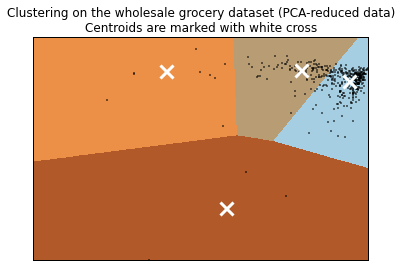

In [14]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data['PC1'], reduced_data['PC2'], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: From PCA we idntified 4 grouping / correlations and I used this value as K . We can see that certain our customers can be devided in 4 such goroups as well.

Majority of the customers are in tow top right clusters. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA gave me most insight by showing the correlations and strong instrests of cusomers. 

**9)** How would you use that technique to help the company design new experiments?

Answer: We could use results of PCA as input parameters in regression, or other types of clusters.

**10)** How would you use that data to help you predict future customer needs?

Answer: By seeing what type of products customers are intersted and this can influence how we interact with them. 